# 22. Tree

**Q1. Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.**

Example:
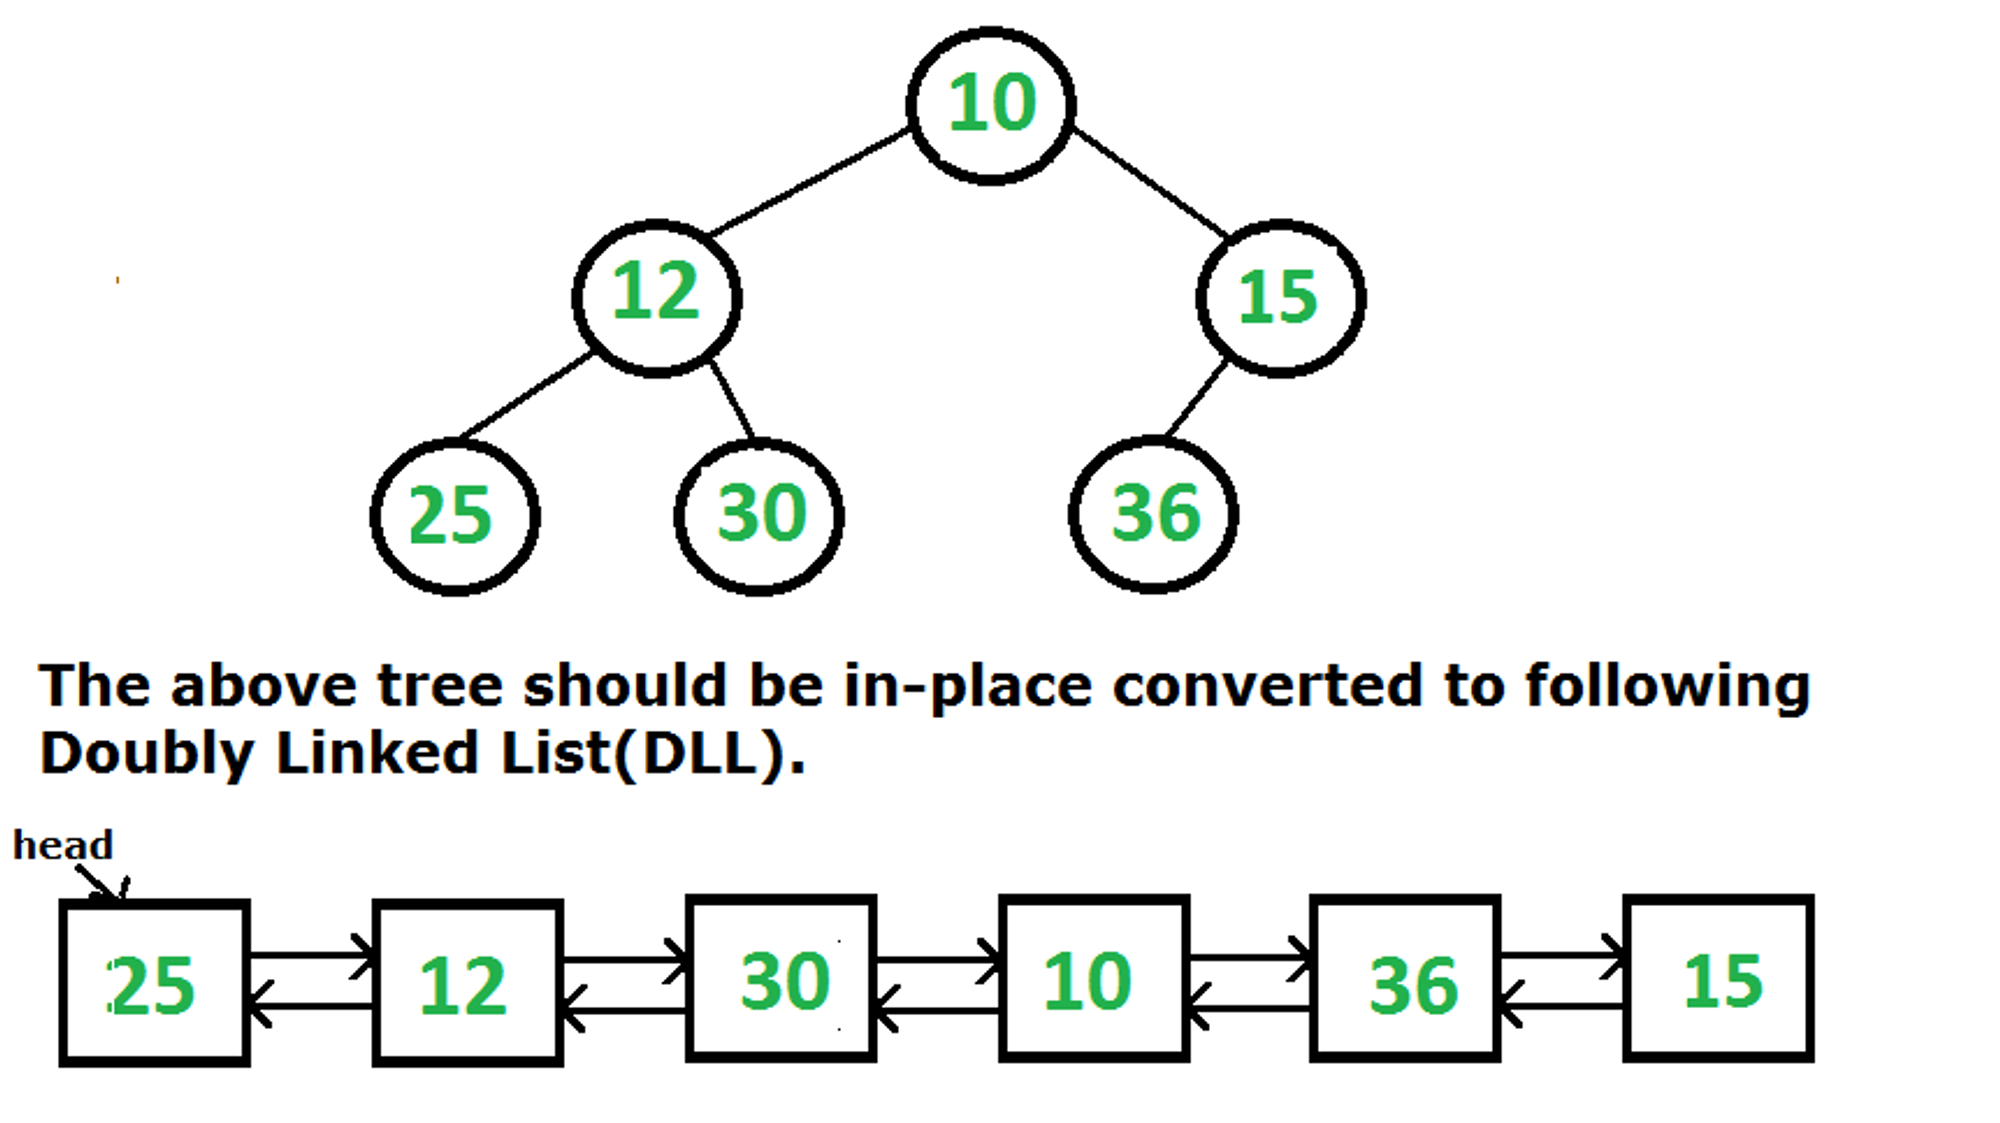

In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def binary_tree_to_dll(root):
    if root is None:
        return None

    # Convert the left subtree and get the tail node of the DLL
    if root.left:
        left_tail = binary_tree_to_dll(root.left)
        left_tail.right = root
        root.left = left_tail
    else:
        left_tail = root

    # Convert the right subtree and get the head node of the DLL
    if root.right:
        right_head = binary_tree_to_dll(root.right)
        right_head.left = root
        root.right = right_head
    else:
        right_head = root

    return right_head

def print_dll(head):
    curr = head
    while curr:
        print(curr.data, end=" ")
        curr = curr.right
    print()
    
root = Node(4)
root.left = Node(2)
root.right = Node(5)
root.left.left = Node(1)
root.left.right = Node(3)

print_dll(binary_tree_to_dll(root))

5 


**Q2. A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.**

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

Example1:

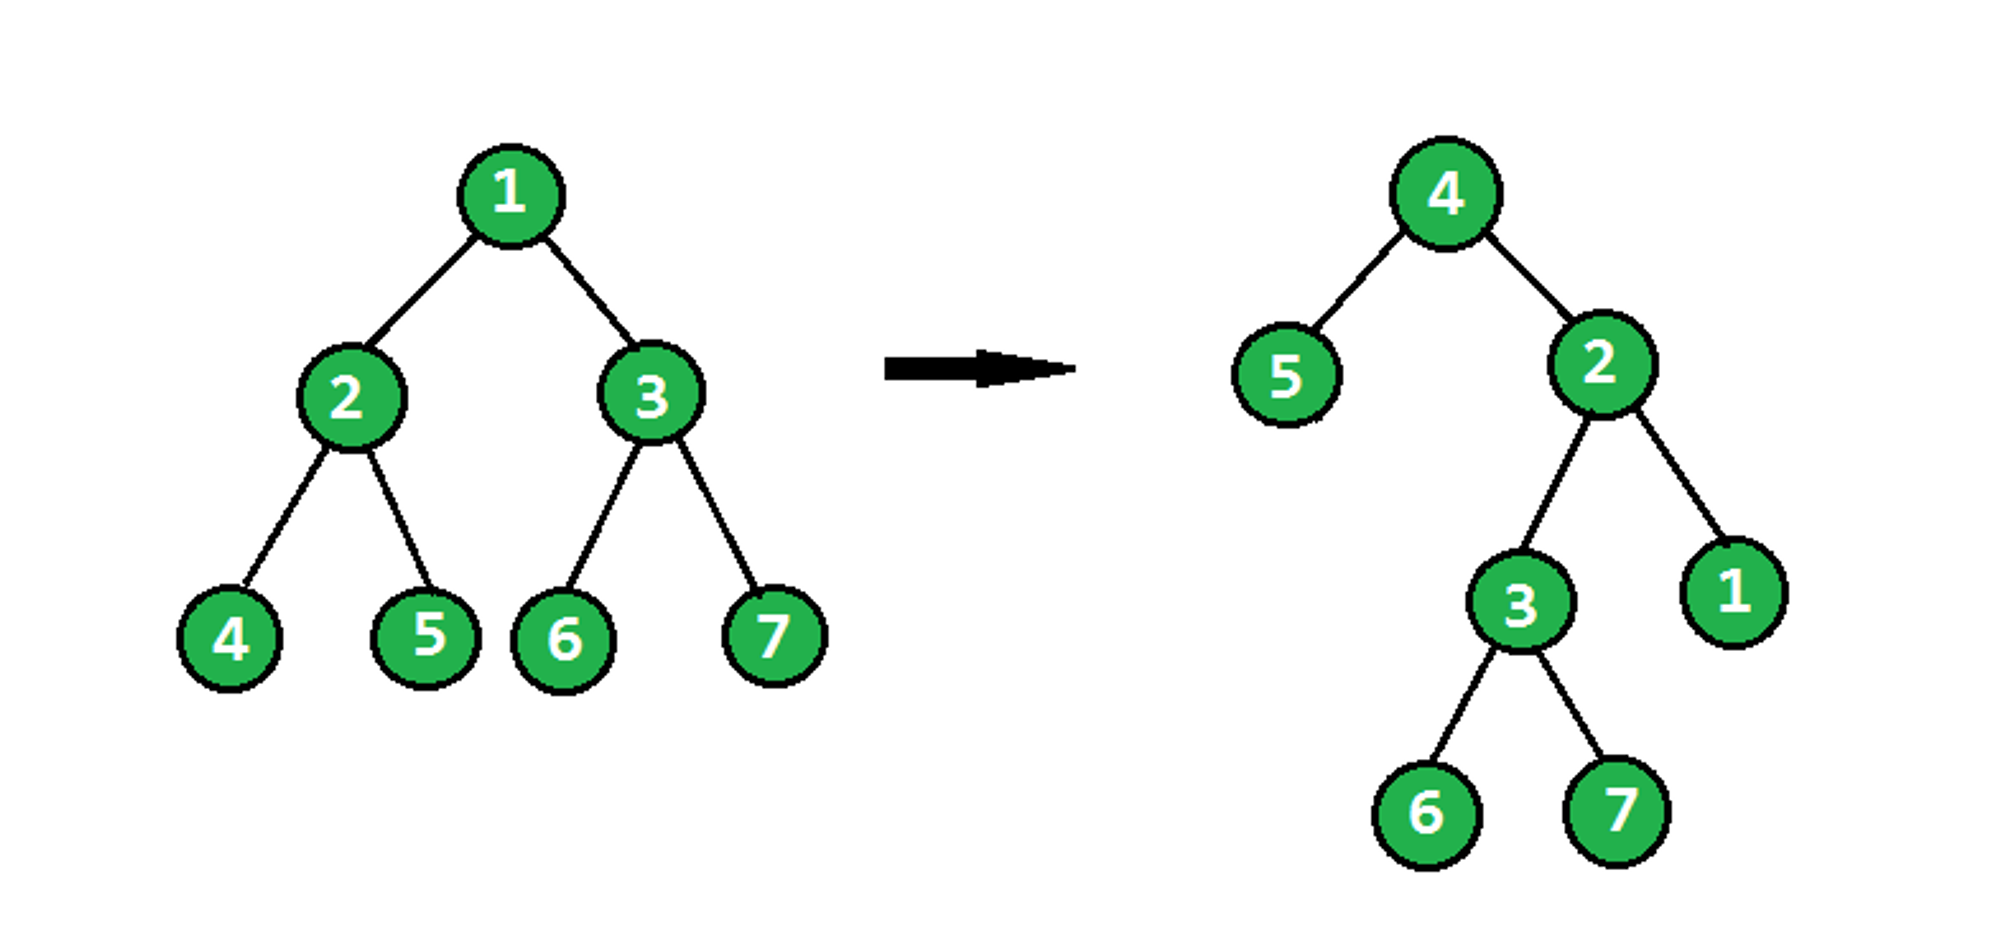

Example2:

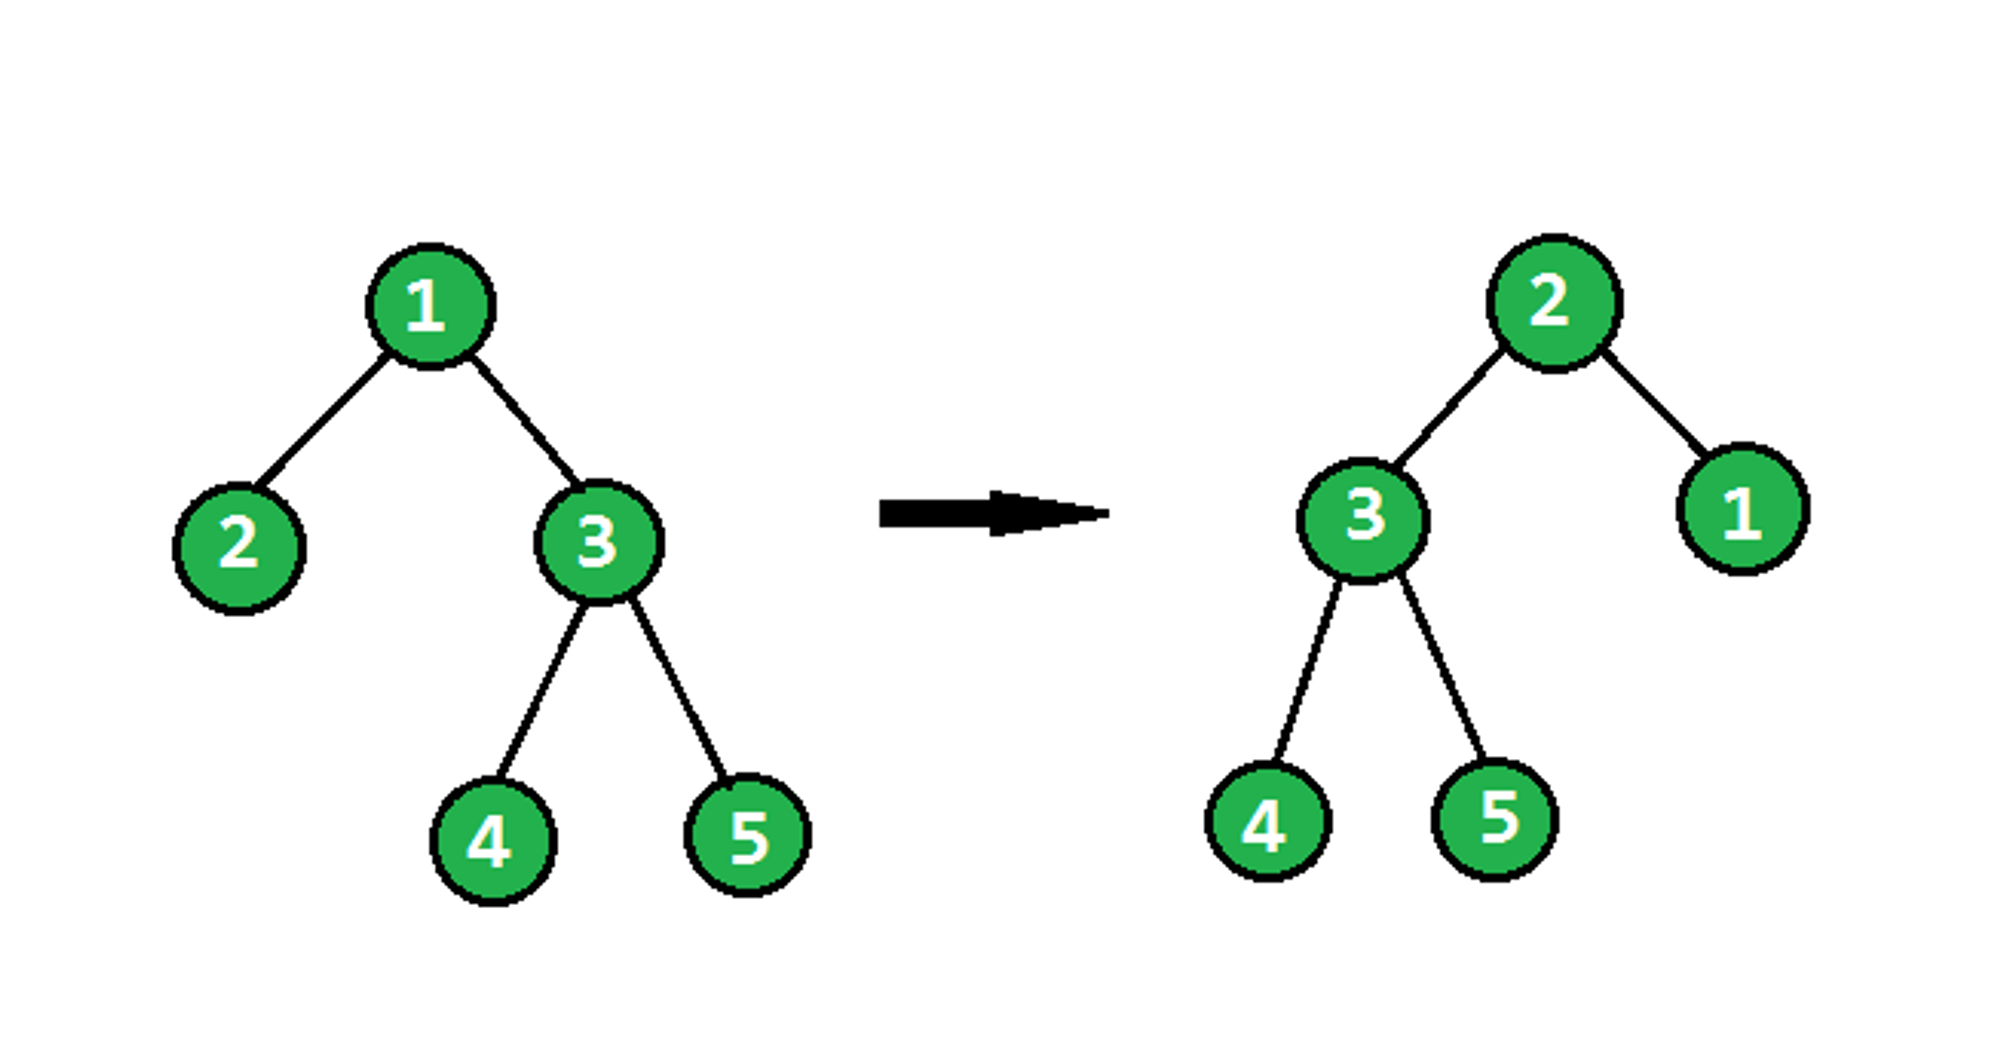

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def flip_binary_tree(root):
    if root is None or (root.left is None and root.right is None):
        return root

    flipped_root = flip_binary_tree(root.left)

    root.left.left = root.right
    root.left.right = root
    root.left = root.right = None

    return flipped_root

def inorder_traversal(root):
    if root is None:
        return

    inorder_traversal(root.left)
    print(root.data, end=" ")
    inorder_traversal(root.right)
    
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)


flipped_root = flip_binary_tree(root)
inorder_traversal(flipped_root)

5 4 3 2 1 

**Q3. Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.**

Input:

        6
     /    \
    3      5
  /   \     \
 2     5     4
     /   \
    7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def root_to_leaf_paths(root):
    if root is None:
        return

    # Stack to store the nodes
    stack = [(root, str(root.data))]

    while stack:
        node, path = stack.pop()

        if node.left is None and node.right is None:
            # Reached a leaf node, print the path
            print(path)
        else:
            if node.right:
                stack.append((node.right, path + "->" + str(node.right.data)))
            if node.left:
                stack.append((node.left, path + "->" + str(node.left.data)))
                
root = Node(6)
root.left = Node(3)
root.right = Node(5)
root.left.left = Node(2)
root.left.right = Node(5)
root.right.right = Node(4)
root.left.right.left = Node(7)
root.left.right.right = Node(4)

root_to_leaf_paths(root)

6->3->2
6->3->5->7
6->3->5->4
6->5->4


**Q4. Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.**

Examples:

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes
Explanation : 

All of the above three traversals are of
the same tree 

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output : 

No

In [2]:
def is_same_tree(inorder, preorder, postorder):
    if not inorder:
        return not preorder and not postorder

    if preorder[0] != postorder[-1]:
        return False

    root = preorder[0]
    root_index = inorder.index(root)

    left_inorder = inorder[:root_index]
    right_inorder = inorder[root_index + 1:]

    left_preorder = preorder[1:root_index + 1]
    right_preorder = preorder[root_index + 1:]

    left_postorder = postorder[:root_index]
    right_postorder = postorder[root_index:-1]

    return is_same_tree(left_inorder, left_preorder, left_postorder) and \
           is_same_tree(right_inorder, right_preorder, right_postorder)

inorder1 = [4, 2, 5, 1, 3]
preorder1 = [1, 2, 4, 5, 3]
postorder1 = [4, 5, 2, 3, 1]
is_same_tree(inorder1, preorder1, postorder1)

True